In [1]:
import pdf2image
import os
from pdf2image import convert_from_path
#import pytesseract as tess 
# Importing the Image module from the PIL package to work with images
from PIL import Image
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import easyocr
import re
import shutil

In [19]:
path_img = r"D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\image"
pdf_origin_path = r"D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\raw"
path_renamed = r"D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\renamed"
reader = easyocr.Reader(['en'])

In [44]:
def copy_and_rename(src_path, dest_path, new_name):
    new_path = f"{dest_path}\\{new_name}"
    # # Copy the file
    # shutil.copy(src_path, new_path)
 
    # Rename the copied file
    print(f"{src_path}")
    #shutil.move(f"{src_path}", new_path)
    shutil.copy(src_path, new_path)

def read_pdf(file_name, reader):
    # Store all pages of one file here:
    pages = []

    try:
        # Convert the PDF file to a list of PIL images:
        # print(file_name)
        images = convert_from_path(file_name, poppler_path=r"D:\prawploy.p\scraping\rpa\poppler-24.02.0\Library\bin")  
        # print(images)
        # Extract text from each image:
        for i, image in enumerate(images):
            # print(i, image)
          # Generating filename for each image
            filename = path_img+r"\page_" + str(i) + "_" + os.path.basename(file_name) + ".jpeg" 
            # print(filename) 
            image.save(filename, "JPEG")  

            break
          # Saving each image as JPEG
            #text = tess.image_to_string(Image.open(filename))  # Extracting text from each image using pytesseract
            #pages.append(text)  
          # Appending extracted text to pages list

    except Exception as e:
        print(str(e))

    img = cv2.imread(filename)
    # print(img.shape) # Print image shape
    # cv2.imshow("original", img)
    
    # Cropping an image
    cropped_image = img[0:300, 1100:1659]
    
    # Display cropped image
    # cv2.imshow("cropped", cropped_image)
    plt.imshow(cropped_image)
    plt.show()
    
    # Save the cropped image
    cv2.imwrite("Cropped_Image.jpg", cropped_image)

    

    # Open an image file
    result = reader.readtext('Cropped_Image.jpg')

    # Print the extracted text
    found = False
    for detection in result:
        if re.search("[A-Z]{1,3}[0-9]{8}", detection[1]):
          found = True
          new_name = re.search("[A-Z]{1,3}[0-9]{8}", detection[1]).group(0)
          # print(detection[1])
          #print(path_renamed, new_name)
          copy_and_rename(file_name, path_renamed, new_name+".pdf")
    if found:
      print("Found")
    else:
      image_rotated = cv2.rotate(cropped_image, cv2.ROTATE_180)



        


<>:1: SyntaxWarning: invalid escape sequence '\*'
<>:1: SyntaxWarning: invalid escape sequence '\*'
C:\Users\prawploy.p\AppData\Local\Temp\ipykernel_32104\2504948572.py:1: SyntaxWarning: invalid escape sequence '\*'
  for file in glob.glob(pdf_origin_path + "\*.pdf"):


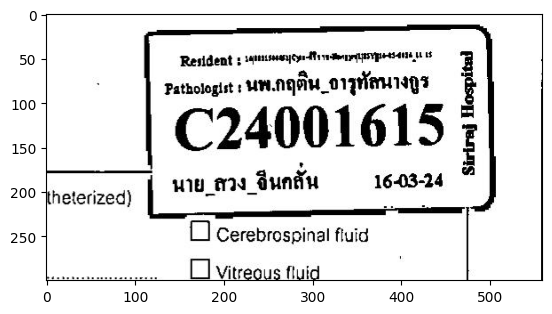

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\raw\1.pdf
Found
None


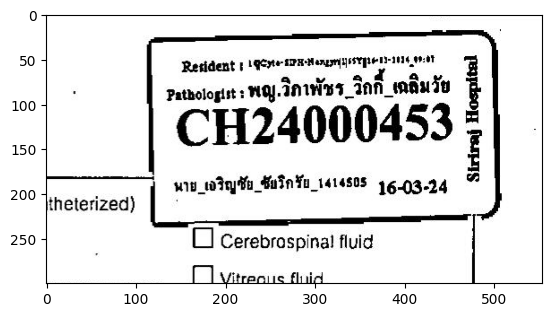

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\raw\2.pdf
Found
None


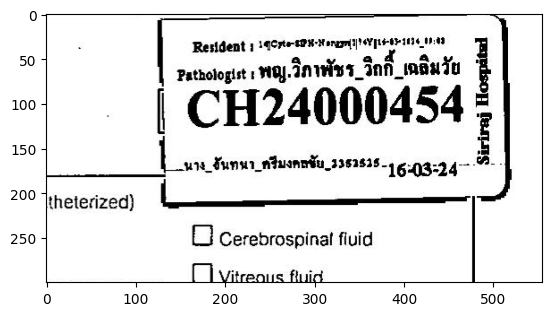

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\raw\3.pdf
Found
None


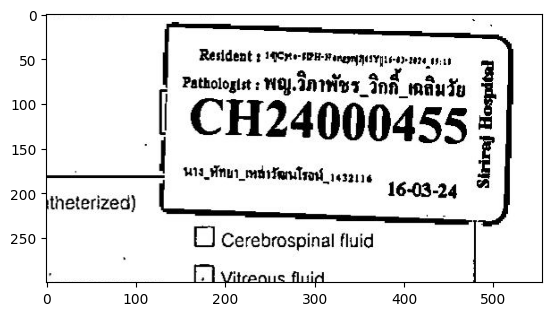

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\raw\4.pdf
Found
None


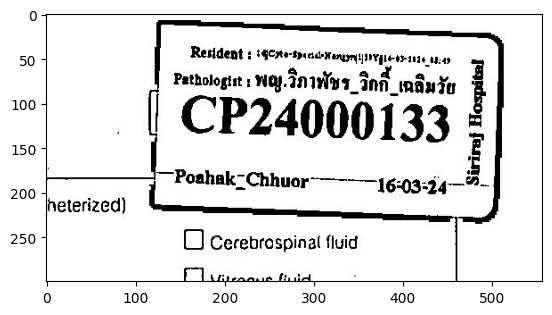

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\raw\5.pdf
Found
None


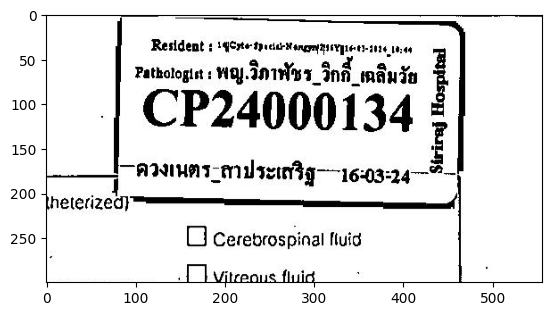

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\raw\6.pdf
Found
None


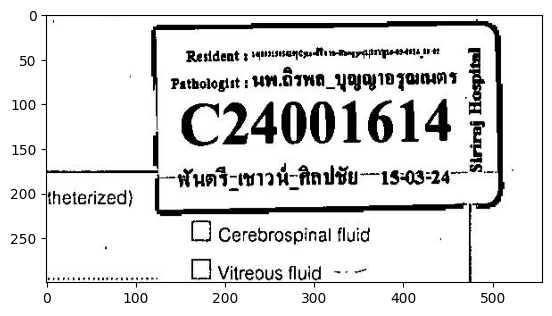

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\raw\7.pdf
Found
None


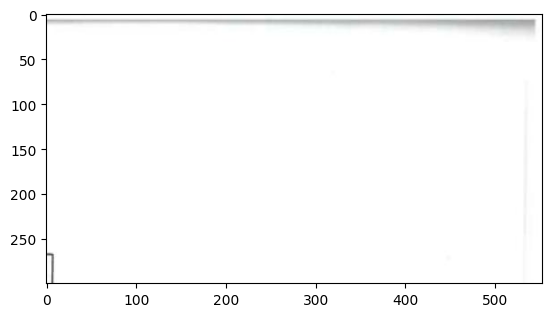

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Not found: D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\raw\SKM_C300i24021516220.pdf
None


In [35]:

for file in glob.glob(pdf_origin_path + "\*.pdf"):
  # pdf_name = file
  print(read_pdf(file, reader))

(2346, 1659, 3)


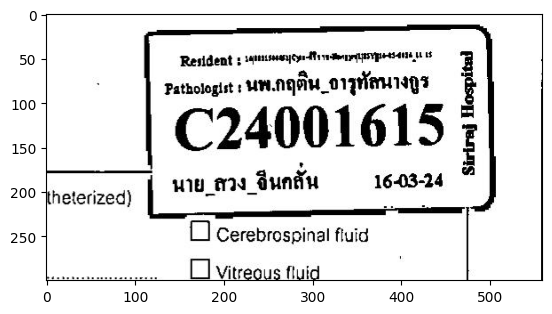

True

In [37]:
img = cv2.imread(r'D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\image\page_0_1.pdf.jpeg')
print(img.shape) # Print image shape
# cv2.imshow("original", img)
 
# Cropping an image
cropped_image = img[0:300, 1100:1659]
 
# Display cropped image
# cv2.imshow("cropped", cropped_image)
plt.imshow(cropped_image)
plt.show()
 
# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)

(300, 559, 3)


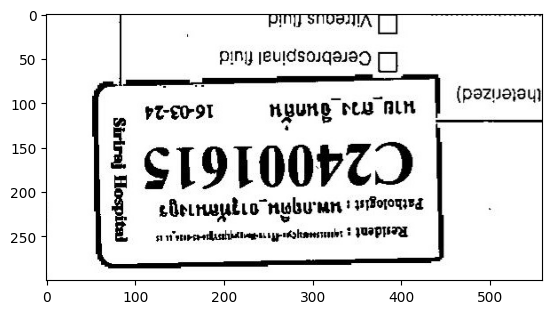

In [38]:
img = cv2.imread(r'D:\prawploy.p\scraping\rpa\sipatho-rpa-scan\rename\Cropped Image_flip.jpg')
print(img.shape) # Print image shape
# cv2.imshow("original", img)
 
# Cropping an image
# cropped_image = img[0:300, 1100:1659]
 
# Display cropped image
# cv2.imshow("cropped", cropped_image)
plt.imshow(img)
plt.show()
 
# Save the cropped image
# cv2.imwrite("Cropped Image.jpg", cropped_image)

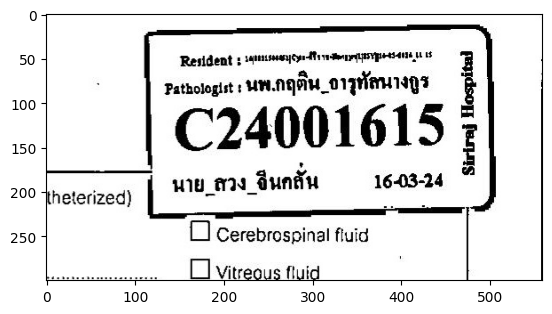

In [43]:
image_rotated = cv2.rotate(img, cv2.ROTATE_180)
plt.imshow(image_rotated)
plt.show()

In [41]:
# Create an OCR reader
reader = easyocr.Reader(['en'])

# Open an image file
result = reader.readtext('Cropped Image.jpg')

# Print the extracted text
for detection in result:
    if re.search("[A-Z]{1,3}[0-9]{8}", detection[1]):
        print(detection[1])
        print(re.search("[A-Z]{1,3}[0-9]{8}", detection[1]).group(0))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


C24001615 |
C24001615
